In [1]:
import torch
import matplotlib.pyplot as plt

# Observed/training input and output
x_train = torch.tensor([1.0, 1.5, 2.0, 3.0, 4.0, 5.0, 6.0]).reshape(-1, 1)  # x_train = [[1], [1.5], [2], [3], [4], [5], [6]]
y_train = torch.tensor([5.0, 3.5, 3.0, 4.0, 3.0, 1.5, 2.0]).reshape(-1, 1)  # y_train = [[5], [3.5], [3], [4], [3], [1.5], [2]]

In [8]:
#Torch.logical_not
torch.logical_not(torch.tensor([True, False]))
torch.logical_not(torch.tensor([0,1,-10], dtype=torch.int8))

tensor([ True, False, False])

In [2]:
class LinearRegressionModel:
    def __init__(self):
        # Model variables
        self.W = torch.tensor([[0.0]], requires_grad=True)  # requires_grad enables calculation of gradients
        self.b = torch.tensor([[0.0]], requires_grad=True)

    # Predictor
    def f(self, x):
        return x @ self.W + self.b  # @ corresponds to matrix multiplication

    # Uses Mean Squared Error
    def loss(self, x, y):
        return torch.mean(torch.square(self.f(x) - y))  # Can also use torch.nn.functional.mse_loss(self.f(x), y) to possibly increase numberical stability

model = LinearRegressionModel()

In [3]:
# Optimize: adjust W and b to minimize loss using stochastic gradient descent
optimizer = torch.optim.SGD([model.W, model.b], 0.01)
for epoch in range(1000):
    model.loss(x_train, y_train).backward()  # Compute loss gradients
    optimizer.step()  # Perform optimization by adjusting W and b,
    # similar to:
    # model.W -= model.W.grad * 0.01
    # model.b -= model.b.grad * 0.01

    optimizer.zero_grad()  # Clear gradients for next step

W = tensor([[-0.5075]], requires_grad=True), b = tensor([[4.7599]], requires_grad=True), loss = tensor(0.3743, grad_fn=<MeanBackward0>)


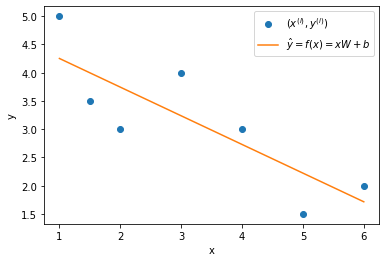

In [4]:
# Print model variables and loss
print("W = %s, b = %s, loss = %s" % (model.W, model.b, model.loss(x_train, y_train)))

# Visualize result
plt.plot(x_train, y_train, 'o', label='$(x^{(i)},y^{(i)})$')
plt.xlabel('x')
plt.ylabel('y')
x = torch.tensor([[torch.min(x_train)], [torch.max(x_train)]])  # x = [[1], [6]]]
plt.plot(x, model.f(x).detach(), label='$\\hat y = f(x) = xW+b$')
plt.legend()
plt.show()